<a href="https://colab.research.google.com/github/doronin99/eda_shoppers/blob/eda/EDA_shoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and data importing

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/doronin99/eda_shoppers/main/online_shoppers_intention.csv')

In [122]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


C

## Describing the data

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
* `BounceRates` - refers to the percentage of visitors who enter the site from that page and then leave without triggering any other requests to the analytics server during that session.
* `ExitRates` - feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* `PageValues` - represents the average value for a web page that a user visited before completing an e-commerce transaction.
* `SpecialDay` - indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day).
* `Month` - month of the year.
* `OperatingSystems` - operating system.
* `Browser` - browser.
* `Region` - region.
* `TrafficType` - traffic type.
* `VisitorType` - returning or new visitor.
* `Weekend` - boolean value indicating whether the date of the visit is weekend.
* `Revenue` - target value (class label)

In [123]:
df.shape

(12330, 18)

In [124]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [125]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


## Droppin dupclicates and inplacing missing values

In [126]:
df.duplicated().sum()

109

In [127]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(12221, 18)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12022 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  11732 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12122 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  int64  
 12  Browser                  12221 non-null  int64  
 13  Region                   12221 non-null  int64  
 14  TrafficType           

In [129]:
round(df['Informational_Duration'].isnull().sum() / len(df) * 100, 1)

1.6

In [130]:
df['Informational_Duration'].value_counts()

0.00      9659
9.00        32
7.00        25
6.00        25
10.00       25
          ... 
43.20        1
66.40        1
246.80       1
274.00       1
211.25       1
Name: Informational_Duration, Length: 1241, dtype: int64

In [131]:
df['Informational_Duration'].fillna(df['Informational_Duration'].median(), inplace=True)

In [132]:
round(df['ProductRelated_Duration'].isnull().sum() / len(df) * 100, 1)

4.0

In [133]:
df['ProductRelated_Duration'].value_counts()

0.000000       615
17.000000       19
11.000000       17
15.000000       16
8.000000        16
              ... 
3141.258333      1
491.000000       1
1192.226190      1
1119.716667      1
346.000000       1
Name: ProductRelated_Duration, Length: 9210, dtype: int64

In [134]:
df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median(), inplace=True)

In [135]:
round(df['ExitRates'].isnull().sum() / len(df) * 100, 1)

0.8

In [136]:
df['ExitRates'].value_counts()

0.200000    595
0.100000    331
0.050000    327
0.033333    289
0.066667    267
           ... 
0.051269      1
0.011562      1
0.021816      1
0.015787      1
0.029031      1
Name: ExitRates, Length: 4746, dtype: int64

In [137]:
df['ExitRates'].fillna(df['ExitRates'].mean(), inplace=True)

## Feature analysis

#### Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration

In [138]:
sts_features = ["Administrative",
               "Administrative_Duration",
               "Informational",
               "Informational_Duration",
               "ProductRelated",
               "ProductRelated_Duration"] # sessions time spent

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>],
       [<Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>]],
      dtype=object)

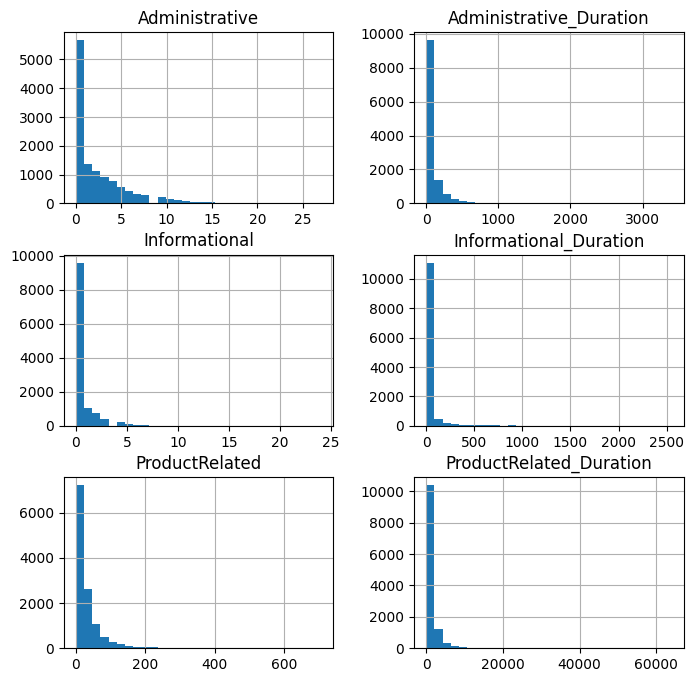

In [139]:
df.hist(column = sts_features, bins=30, figsize=(8,8))

**All the features are strongly biased to zero.**

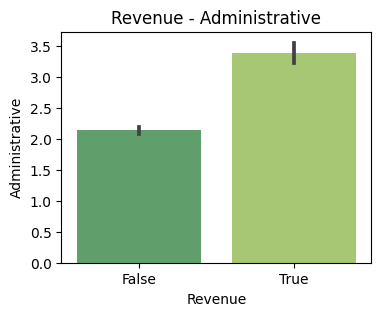

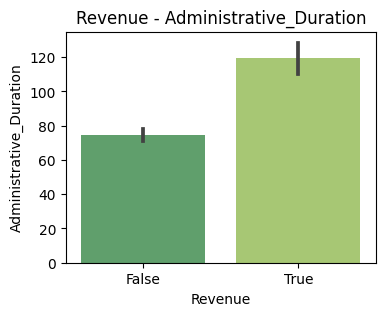

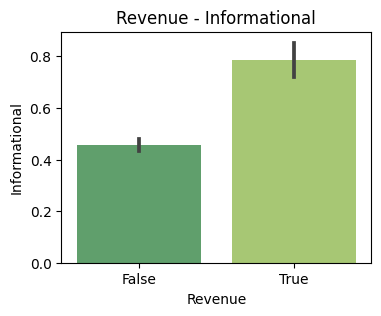

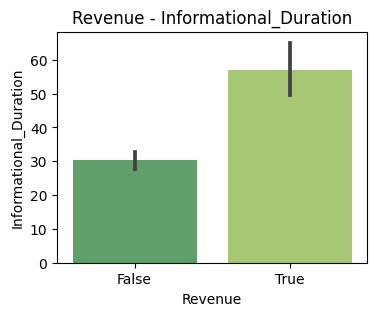

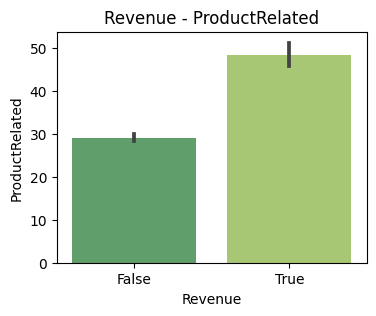

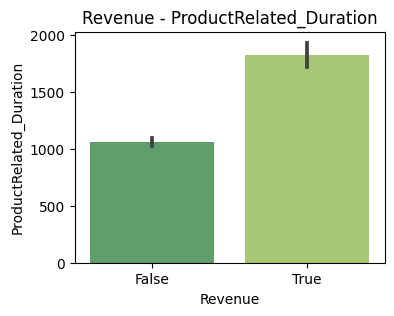

In [140]:
for feature in sts_features:
  plt.figure(figsize=(4,3))
  sns.barplot(x='Revenue', y=feature, data = df, palette='summer')
  plt.title(f'Revenue - {feature}')
  plt.show()

**The mean for each attribute is higher for those cases where the purchase was made (which seems logical)**

#### The metrics measured by "Google Analytics"

In [141]:
ga_features = ["BounceRates", "ExitRates", "PageValues"]

array([[<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>, <Axes: >]], dtype=object)

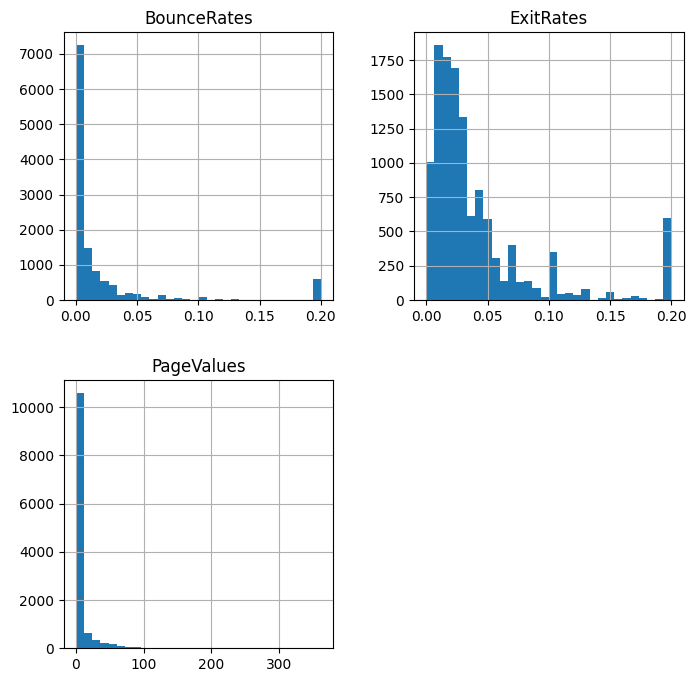

In [142]:
df.hist(column = ga_features, bins=30, figsize=(8,8))

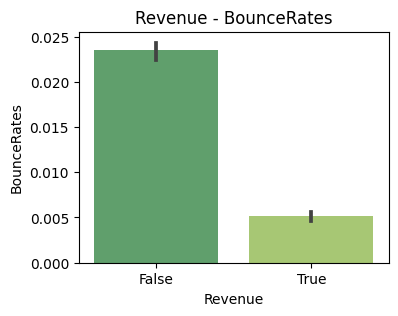

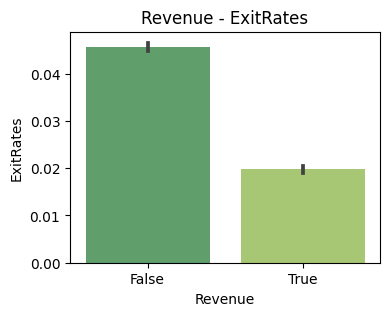

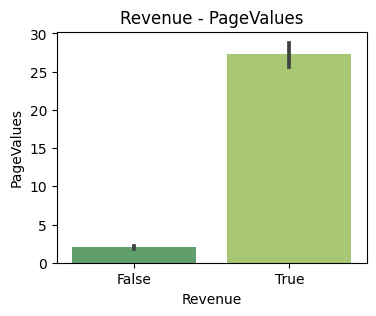

In [143]:
for feature in ga_features:
  plt.figure(figsize=(4,3))
  sns.barplot(x='Revenue', y=feature, data = df, palette='summer')
  plt.title(f'Revenue - {feature}')
  plt.show()

#### Special Day

<Axes: >

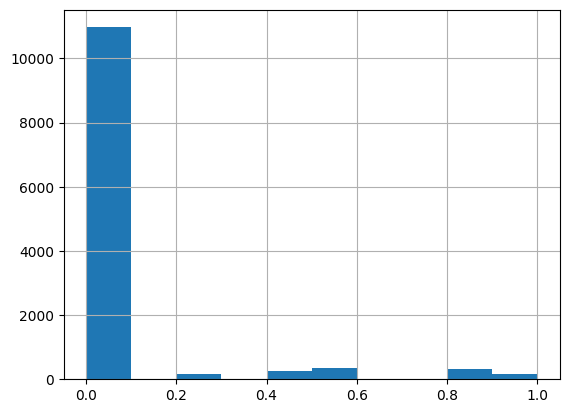

In [144]:
df["SpecialDay"].hist()

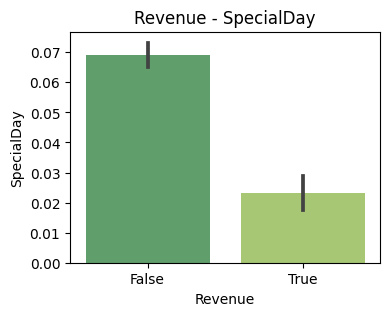

In [145]:
plt.figure(figsize=(4,3))
sns.barplot(x='Revenue', y='SpecialDay', data = df, palette='summer')
plt.title('Revenue - SpecialDay')
plt.show()

#### Other features

In [146]:
df['Month'].value_counts()

May     3316
Nov     2965
Mar     1857
Dec     1696
Oct      545
Sep      446
Aug      431
Jul      429
June     285
Feb      181
aug       70
Name: Month, dtype: int64

In [147]:
df['Month'].replace('aug', 'Aug', inplace=True)

The uneven distribution of data over months can lead to inadequate results (unless this unevenness is caused by natural causes, for example, a decrease in user activity in these months). Moreover, there are no data for January and April.

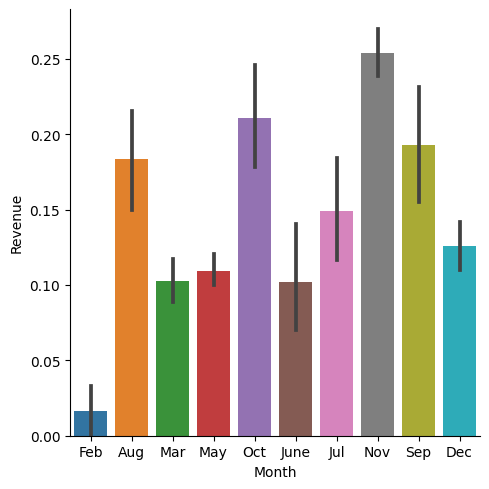

In [148]:
sns.catplot(data=df, x="Month", y="Revenue", kind="bar")

In [149]:
df['OperatingSystems'].value_counts()

2    6547
1    2557
3    2532
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [150]:
df['Browser'].value_counts()

2     7890
1     2435
4      732
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [151]:
df['Region'].value_counts()

1    4722
3    2381
4    1173
2    1131
6     801
7     758
9     505
8     432
5     318
Name: Region, dtype: int64

In [152]:
df['TrafficType'].value_counts()

2     3912
1     2399
3     2017
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [153]:
df['VisitorType'].value_counts()

Returning_Visitor    10446
New_Visitor           1694
Other                   81
Name: VisitorType, dtype: int64

In [154]:
df['Weekend'].value_counts()

False    9360
True     2861
Name: Weekend, dtype: int64

## Correlation analysis and ANOVA

<Axes: >

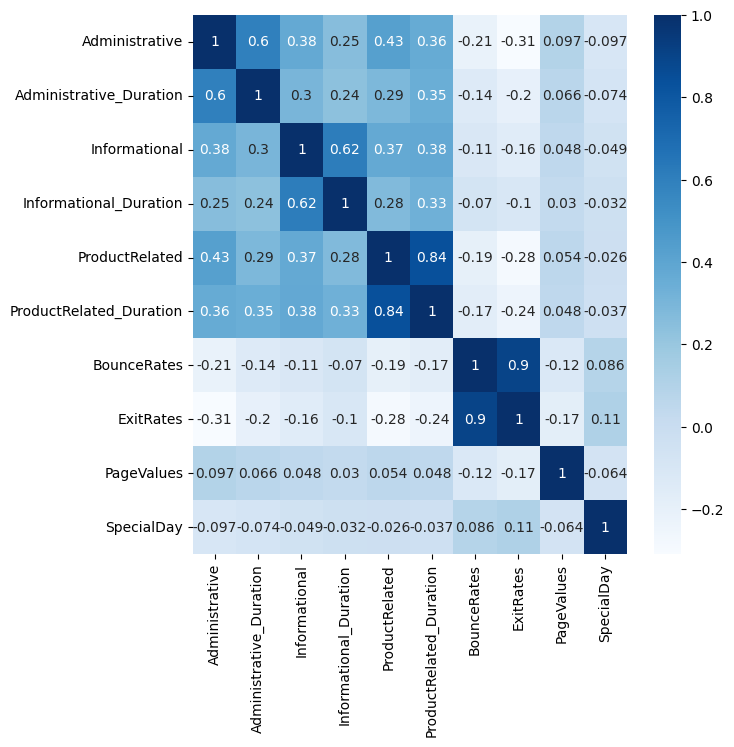

In [155]:
corr = df[sts_features + ga_features + ['SpecialDay']].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Blues", annot=True)

Strong correlation between `BounceRates` abd `ExitRates` seems logical, considering the meaning of these variables. It's reasonable to drop one of these columns to avoid the multicollinearity problem

In [156]:
df.drop(columns=['BounceRates'], inplace=True)

In [157]:
!pip install association-metrics -q

In [158]:
import association_metrics as am

cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)

df_cat = df.apply(lambda x: x.astype("category") if x.name in cat_features else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.061935,0.069465,0.045622,0.199345,0.137251,0.064912,0.175457
OperatingSystems,0.061935,1.000000,0.594720,0.114603,0.191472,0.453646,0.119875,0.078437
Browser,0.069465,0.594720,1.000000,0.125797,0.189186,0.504222,0.087512,0.048904
Region,0.045622,0.114603,0.125797,1.000000,0.085438,0.174016,0.029911,0.028040
TrafficType,0.199345,0.191472,0.189186,0.085438,1.000000,0.375859,0.150928,0.171864
VisitorType,0.137251,0.453646,0.504222,0.174016,0.375859,1.000000,0.053418,0.103550
Weekend,0.064912,0.119875,0.087512,0.029911,0.150928,0.053418,1.000000,0.027858
Revenue,0.175457,0.078437,0.048904,0.028040,0.171864,0.103550,0.027858,1.000000


The strongest relation is between `Browser` and `OperatingSystems`

In [159]:
from scipy.stats import f_oneway

Data = []

for c1 in df_cat.columns:
    for c2 in df_cat.columns:
        if df_cat[c1].dtype == 'category' and df_cat[c2].dtype != 'category':
            CategoryGroupLists = df_cat.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
...,...,...,...
67,Revenue,ProductRelated,Yes
68,Revenue,ProductRelated_Duration,Yes
69,Revenue,ExitRates,Yes
70,Revenue,PageValues,Yes


## Target variable

<Axes: >

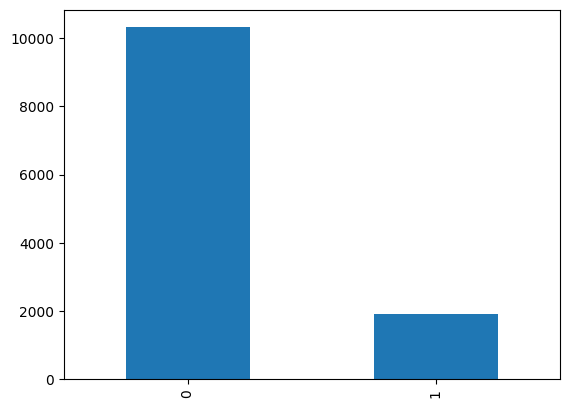

In [174]:
df['Revenue'].value_counts().plot(kind='bar')

**The data between the two categories is unevenly distributed. This can negatively affect the result of the model.**

## Pandas vs. Polars

In [175]:
df_big = df.copy()

for i in range(int(1_000_000/12_000)):
  df_big = pd.concat([df_big, df])

df_big.to_csv("big.csv", index=False)

In [176]:
df_big.shape, df.shape

((1026564, 17), (12221, 17))

In [177]:
!pip install polars

import polars as pl

#### Data importing

In [179]:
# Pandas
%%time

df = pd.read_csv("big.csv")

CPU times: user 2.49 s, sys: 178 ms, total: 2.67 s
Wall time: 6.29 s


In [178]:
# Polars
%%time

df_pl = pl.read_csv("big.csv")

CPU times: user 1.2 s, sys: 315 ms, total: 1.52 s
Wall time: 2.53 s


**Pandas vs. Polars - 0:1**

#### Data filtering

In [181]:
# Pandas
%%time

df.query('Region > 2')

CPU times: user 56.6 ms, sys: 448 µs, total: 57 ms
Wall time: 68.1 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,0,0.00,0,0.0,1,0.000000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
6,0,0.00,0,0.0,1,0.000000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,0,0
10,0,0.00,0,0.0,3,395.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,0,0
11,0,0.00,0,0.0,16,407.750000,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,0,0
14,0,0.00,0,0.0,2,68.000000,0.100000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026552,0,0.00,0,0.0,6,279.000000,0.033333,0.0,0.0,Dec,1,2,3,10,Returning_Visitor,1,0
1026554,0,0.00,0,0.0,8,143.583333,0.050000,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,0,0
1026555,0,0.00,0,0.0,6,0.000000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,0,0
1026556,6,76.25,0,0.0,22,1075.250000,0.004167,0.0,0.0,Dec,2,2,4,2,Returning_Visitor,0,0


In [182]:
# Polars
%%time

df_pl.filter(pl.col('Region') > 2)

CPU times: user 94.6 ms, sys: 54 ms, total: 149 ms
Wall time: 119 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,i64,i64
0,0.0,0,0.0,1,0.0,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,1,0.0,0.2,0.0,0.4,"""Feb""",2,4,3,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,3,395.0,0.066667,0.0,0.0,"""Feb""",1,1,3,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,16,407.75,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,2,68.0,0.1,0.0,0.0,"""Feb""",3,2,3,3,"""Returning_Visi…",0,0
2,53.0,0,0.0,23,1668.285119,0.016313,0.0,0.0,"""Feb""",1,1,9,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,1,0.0,0.2,0.0,0.0,"""Feb""",1,1,4,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,20,2981.166667,0.01,0.0,0.0,"""Feb""",2,4,4,4,"""Returning_Visi…",0,0
0,0.0,0,0.0,8,136.166667,0.008333,0.0,1.0,"""Feb""",2,2,5,1,"""Returning_Visi…",1,0


**Pandas vs. Polars - 1:1**

#### Data aggregation

In [183]:
# Pandas
%%time

df.groupby('Revenue').agg({'ProductRelated' : 'mean', 'ExitRates' : 'max'})

CPU times: user 42 ms, sys: 610 µs, total: 42.6 ms
Wall time: 71.6 ms


,ProductRelated,ExitRates
Revenue,,
0,29.006981,0.2
1,48.210168,0.2


In [184]:
# Polars
%%time

df_pl.groupby('Revenue').agg([pl.mean('ProductRelated'), pl.max('ExitRates')])

CPU times: user 52.3 ms, sys: 1.01 ms, total: 53.3 ms
Wall time: 65.8 ms


Revenue,ProductRelated,ExitRates
i64,f64,f64
0,29.006981,0.2
1,48.210168,0.2


**Pandas vs. Polars - 1:2**